# Module 8 Exercises - Logistic Regression

### Exercise 1:

[Download the diabetes.csv file](https://notebooks.azure.com/priesterkc/projects/DABmaterial/tree/datasets) and load it in as a dataframe. Narrow your dataset to include columns and/or rows that best predicts the outcome of if a patient will get diabetes.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
location = "datasets/diabetes.csv"
df= pd.read_csv(location)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


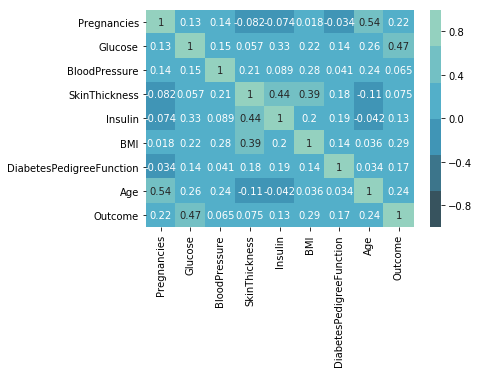

In [5]:
corr = df.corr()
green = sns.color_palette("GnBu_d")
sns.heatmap(corr,
           vmin = -1,
           annot = True,
           cmap = green)

In [6]:
df1 = df.copy()
df1 = df1.drop(df1.columns[[0,2,3,4,6]], axis = 1)

In [7]:
df1.dtypes

Glucose      int64
BMI        float64
Age          int64
Outcome      int64
dtype: object

In [8]:
df1.count()

Glucose    768
BMI        768
Age        768
Outcome    768
dtype: int64

In [9]:
df1=df1.dropna()

In [10]:
df1.count()

Glucose    768
BMI        768
Age        768
Outcome    768
dtype: int64

### Exercise 2:

Using the dataframe in the exercise above, split the dataset into training and testing. Use the default 25% test setting.

In [11]:
from sklearn.linear_model import LinearRegression

#make dataframe that only contains predictive features
X = df1.drop('Outcome', axis = 1)

#assign linear regression function to a variable
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
#test_size default = 0.25
#train_test_split function give back 4 variables
#2 variables for X (the predictive features) - training and testing
#2 variables for y (the target) - training and testing

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, df1.Outcome, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(576, 3)
(192, 3)
(576,)
(192,)


### Exercise 3:

Using the logistic regression function in the scikit-learn library (sklearn), fit the model with the training dataset. Then score the model for training; how well did it do?

In [13]:
lm.fit(X, df1['Outcome'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
lm.score(X, df1['Outcome'])

0.27090181312400763

In [15]:
#calculate the model using the training data
lm.fit(X_train, Y_train)

#predictions for training and test data
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [16]:
#evaluate the accuracy of the model of training vs test
print(lm.score(X_train, Y_train))


0.2793008420275096


### Exercise 4:

Now use the test dataset on the logistic regression function and get its score.

In [17]:
print(lm.score(X_test, Y_test))

0.22195642220239395


### Exercise 5:

Make a confusion matrix for the predicted outcomes to compare it against the "true" outcomes. How many values for each outcome did the model get incorrect?

In [18]:
#generate prediction values
y_pred = lm.predict(X_test)

In [20]:
cm = pd.DataFrame(
    confusion_matrix(Y_test, y_pred),
    columns=['Predicted No Diabetes', 'Predicted Diabetes'],
    index=['True Not Diabetes', 'True Diabetes']
)

cm

ValueError: Classification metrics can't handle a mix of binary and continuous targets

### Exercise 6:

Get a classification report on the model for the predicted data. Which outcome is the model more accurate at predicting?